In [2]:
##########################
# LINEAR REGRESSION MODELS
##########################
#  ^
#  |       °/
#  |       /°
#  |     °/ °
#  |   ° /  °
#  |    / °
#  | ° /°
#  | °/°
# -+----------------->
#  |


#######################
# 1. IMPORTANT PACKAGES
#######################

# os (Operative Systems) is a Python package useful to access a lot of operative system functionalities (change folder,
# checking existence of files and directories, creating files and directories, etc.). Its functions work independently
# of the operative system in use, thus it helps programmers to develop Python scripts runnable both in DOS and UNIX-like
# OS.
import os

# as the name says, the random package deals with randomness, more in general with combinatorics stuff.
import random

# NumPy (Numerical Python) is one of the most important packages to perform scientific computations in Python. It's the
# starting point for many other Python scientific packages. The efficiency of NumPy relies on the fact that it
# relies on the C routines of the BLAS library.

# the as command renames "numpy" with "np" so that the programmer can call numpy functions writing np.<function_name>
# instead of the entire name. This is a common practice in Python.
import numpy as np

# SciPy (Scientific Python) is a package built on NumPy containing a lot of high-level algorithms from a variety of
# scientific fields (image and audio processing, linear algebra, statistics, etc.)

# stats is a Python module used to perform statistics computation.
# SciPy site advices to import its modules using the from scipy import <module_name> statement
from scipy import stats

# pandas is a package built on NumPy that is more focused on Data Analysis and Data Manipulation. It won't be covered
# too much in this lesson
import pandas as pd

# Matplotlib is a package built on NumPy gives access to graphical features to be used to draw plots
import matplotlib.pyplot as plt

# sklearn (scikit-learn) is a package built on SciPy, Pandas, Matplotlib, containing a huge number of machine learning
# algorithms, divided in six groups: classification, regression, clustering, dimensionality reduction, model selection,
# preprocessing.

# linear_model is a module used to perform linear regression
from sklearn import linear_model

# global variables. The user can change these variables according to its needs
ROOT = os.path.expanduser("~")
DATA_DIR = ROOT + "/Datasets/Public"
FAITHFUL_DATA = DATA_DIR + "/old_faithful.txt"

# set a seed to test if algorithms work
np.random.seed(314)

In [3]:
#################
# 2. READING DATA
#################

# with files utilities (generate a list of lists of floats, can be done also with csv reader)
# useful if you want to preprocess the data in some particular ways, that would be a costly operation if
# performed directly on a NumPy array
with open(os.path.normpath(FAITHFUL_DATA), 'r') as data_file:
    data = [[float(x) for x in str.split(line)] for line in list(data_file)[3:]]

In [4]:
# with Pandas (generate a Pandas DataFrame)
data = pd.read_csv(filepath_or_buffer=FAITHFUL_DATA, delim_whitespace=True, skip_blank_lines=True, comment='#')

In [5]:
# with NumPy (generate a NumPy array)
data = np.genfromtxt(FAITHFUL_DATA, skip_header=3)  # returns a NumPy array

# shuffle data and divide between train and test sets.
# N.B. When working on real problems, remember to create a validation set too!
np.random.shuffle(data)
train = data[:200, :]   # shape: (200, 2)
test = data[200:, :]    # shape: (72, 2)

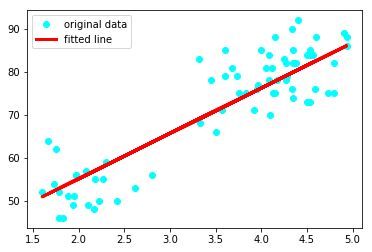

intercept: 34.0384, slope: 10.5456
R^2 statistic: 0.814287, p-value: 2.58543e-74


In [6]:
#################################
# 3. PERFORMING LINEAR REGRESSION
#################################

# with SciPy
# linregress accepts 2 parameters: x and y, however only x can be passed, provided it is 2-dimensional and one dimension
# has length 2
slope, intercept, r_value, p_value, _ = stats.linregress(train)

plt.plot(test[:, 0], test[:, 1], 'o', color='cyan', label='original data')
plt.plot(test[:, 0], intercept + slope * test[:, 0], 'r', color='red', linewidth=3, label='fitted line')
plt.legend()
plt.show()

print("intercept: %g, slope: %g" % (intercept, slope))
# r_value is the correlation coefficient (r_value ** 2.0 is the R^2 statistic), while p_value is the p-value measuring
# the two-sided probability that the slope is 0
print("R^2 statistic: %g, p-value: %g" % (r_value**2.0, p_value))

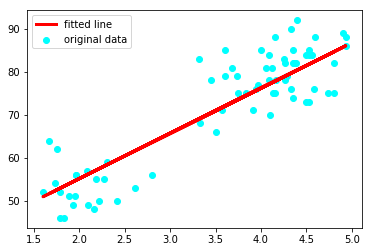

intercept: 34.0384, slope: 10.5456
R^2 statistic: 0.801522


In [16]:
# with sklearn

# since version 0.17 sklearn deprecates ndarrays of shape (n_obs,). Instead, reshape them to (n_obs, 1).
# setting -1 in reshape takes care of counting how many observations our ndarray has, without specifying it
# explicitly.
x_train = train[:, 0].reshape(-1, 1)
y_train = train[:, 1].reshape(-1, 1)
x_test = test[:, 0].reshape(-1, 1)
y_test = test[:, 1].reshape(-1, 1)

# create a LinearRegression object and fit it to the training data
reg_mod = linear_model.LinearRegression(normalize=True)
reg_mod.fit(x_train, y_train)

# scatter is an alternative way to make scatter plots
plt.scatter(x_test, y_test, color='cyan', label='original data')
plt.plot(x_test, reg_mod.predict(x_test), color='red', linewidth=3, label='fitted line')
plt.legend()
plt.show()

print("intercept: %g, slope: %g" % (reg_mod.intercept_, reg_mod.coef_))
# sklearn does not compute the p-value of the coefficients
print("R^2 statistic: %g" % reg_mod.score(x_test, y_test))

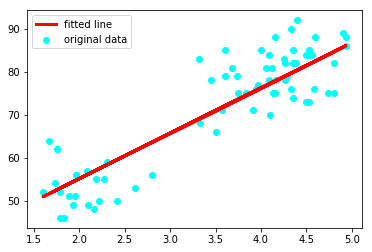

intercept: 34.0384, slope: 10.5456
R^2 statistic: 0.976561


In [34]:
#######################
# 4. DO IT BY YOURSELF!
#######################

x_train = x_train.ravel()
y_train = y_train.ravel()
x_test = x_test.ravel()
y_test = y_test.ravel()

# add the column of the intercept to the matrix of observations
# N.B. This work correctly if x_train has not the shape (n_obs,), otherwise it will concatenate the ones
n_obs = x_train.shape[0]
X = np.vstack((np.ones((n_obs,)), x_train)).T

# estimate the parameters. the "@" operator perform matrix multiplication
beta = np.linalg.inv(X.T @ X) @ (X.T @ y_train)

y_predicted = beta[0] + beta[1] * x_test
# y_predicted = beta[0] + beta[1] * x_train

# plot the results
plt.scatter(x_test, y_test, color='cyan', label='original data')
plt.plot(x_test, y_predicted, color='red', linewidth=3, label='fitted line')
plt.legend()
plt.show()

# print R^2 statistic
M0 = np.eye(y_predicted.shape[0]) - 1/n_obs
ESS = y_predicted.T @ M0 @ y_predicted
TSS = y_test.T @ M0 @ y_test
R2 = ESS/TSS

# adj_R2 = 1 - ((1 - R2) * (n - 1) / (n - k - 1))
print("intercept: %g, slope: %g" % (beta[0], beta[1]))
print("R^2 statistic: %g" % R2)

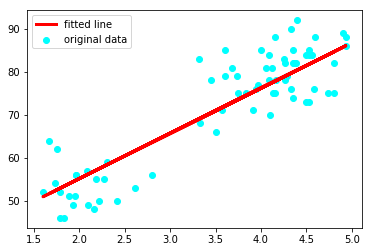

intercept: 34.0374, slope: 10.5459
R^2 statistic: 0.814328


In [33]:
# if x_train is a huge matrix, the previous beta estimation cannot be done. Thus, we resort to
# gradient descent methods


def OLS_GD(X, y, alpha, batch_size=1, tol=1e-5, max_iter=10000):
    """
       This function estimates the parameters for a
       linear regression model using the stochastic
       gradient descent (SGD) method.
       :param X: the observation matrix.
       :param y: the targets of the observations.
       :param alpha: the learning parameter. Lower values
              correspond to slower convergence but prevent
              overshooting.
       :param batch_size: the size of the batch to perform a
              single update of the parameters. If
              batch_size = 1 the algorithm performs the
              stochastic gradient descent, if 
              batch_size >= X.shape[0] the algorithm 
              performs the batch gradient descent.
       :param tol: the error tolerance. If the norm of
              of the difference vector between
              the parameter vectors at time t and
              t - 1 is lower than tol, the 
              algorithm stops.
       :param max_iter: the maximum number of
              iterations. The algorithm stops
              if this number of iterations is reached.
       :return beta: the parameter vector
       :return R2: the R^2 statistic
    """

    # initialization of parameters
    n = X.shape[0]
    k = X.shape[1]
    batches = range(0, n, batch_size)
    beta = np.zeros((k,))
    beta_old = np.full((k,), np.inf)
    iterations = 0

    while (np.linalg.norm(beta - beta_old) > tol) and (iterations < max_iter):
        iterations += 1

        # copy beta
        beta_old = beta.copy()

        # shuffle the batch to avoid bias
        random.shuffle(batches)

        for i in batches:
            xs, ys = (X[i:(i + batch_size), :], y[i:(i + batch_size)])
            beta += alpha * ((ys - xs @ beta) * xs.T).sum(1)

    # compute predicted values and R^2 statistic
    y_hat = X @ beta
    M0 = np.eye(y_hat.shape[0]) - 1 / n_obs
    ESS = y_hat @ M0 @ y_hat
    TSS = y @ M0 @ y
    R2 = ESS / TSS
    return beta, R2


beta, R2 = OLS_GD(X, y_train, 0.0005, batch_size=200, max_iter=10000)
y_predicted = beta[0] + beta[1] * x_test

# plot the results
plt.scatter(x_test, y_test, color='cyan', label='original data')
plt.plot(x_test, y_predicted, color='red', linewidth=3, label='fitted line')
plt.legend()
plt.show()

print("intercept: %g, slope: %g" % (beta[0], beta[1]))
print("R^2 statistic: %g" % R2)